In [36]:
import pandas as pd
import seaborn as sns
from collections import Counter
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('../data/train.csv')

In [3]:
df.head()

,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
0,00RL8Z82B2Z1,aff3928535f48,1541037460,1,search for poi,Newtown,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
1,00RL8Z82B2Z1,aff3928535f48,1541037522,2,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
2,00RL8Z82B2Z1,aff3928535f48,1541037522,3,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
3,00RL8Z82B2Z1,aff3928535f48,1541037532,4,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
4,00RL8Z82B2Z1,aff3928535f48,1541037532,5,interaction item image,109038,AU,"Sydney, Australia",mobile,NaN,NaN,NaN


In [39]:
# only 1/15 of the interactions have filters applied
df.count()

user_id            15932992
session_id         15932992
timestamp          15932992
step               15932992
action_type        15932992
reference          15932992
platform           15932992
city               15932992
device             15932992
current_filters     1153112
impressions         1586586
prices              1586586
dtype: int64

In [45]:
# number of unique users
unique_user_count = len(df['user_id'].unique())
unique_user_count

730803

In [46]:
# number of unique sessions
unique_session_count = len(df['session_id'].unique())
unique_session_count

910683

In [83]:
# sessions per user
sessions_per_user_df = df[['user_id', 'session_id']].drop_duplicates().groupby('user_id').count()

In [82]:
session_count_df = pd.DataFrame.from_dict(Counter(sessions_per_user_df['session_id']), orient='index')
session_count_df = session_count_df.sort_index().rename(columns={0: 'user_count'})
session_count_df.index.name = 'session_count'
session_count_df

,user_count
session_count,
1,610601
2,86211
3,21180
4,7158
5,2828
6,1315
7,576
8,361
9,201


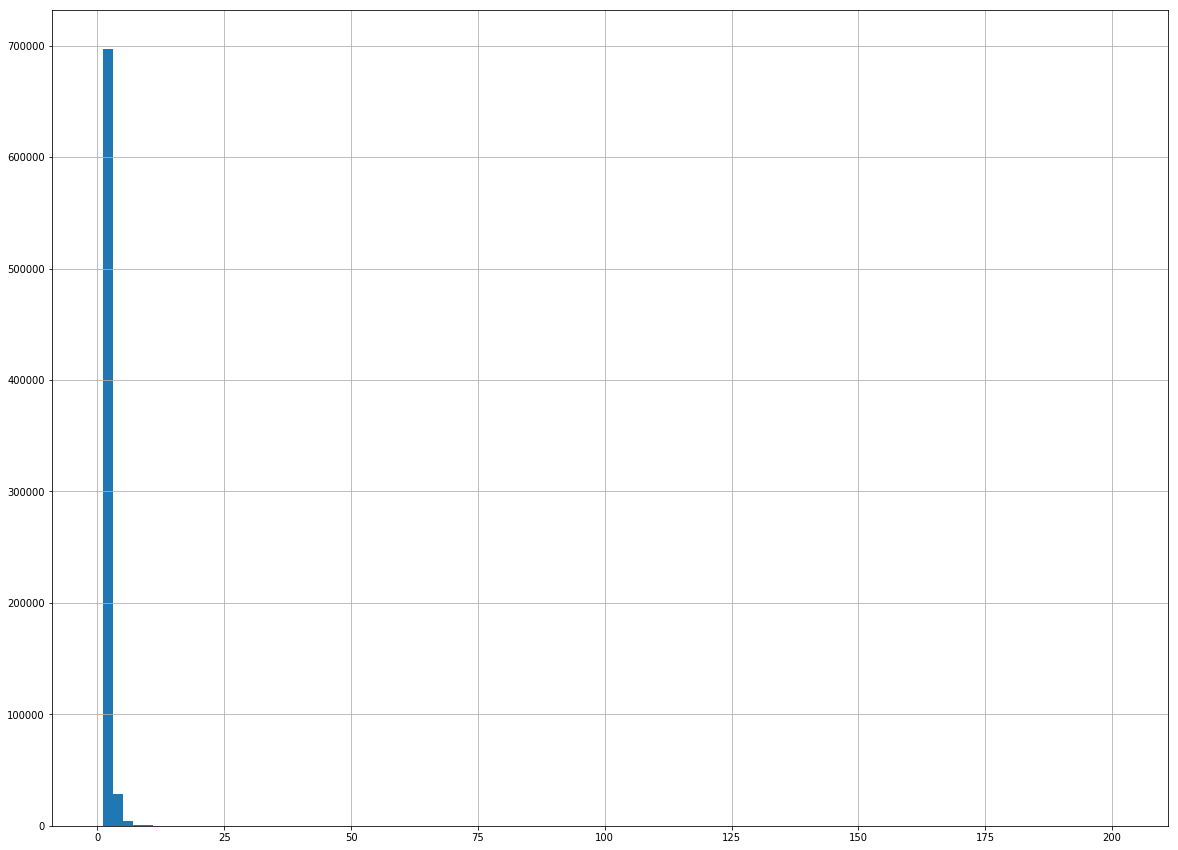

In [64]:
plt.figure(2, figsize=(20,15))
sessions_per_user_df['session_id'].hist(bins=100)

In [10]:
action_types_hist = Counter(df['action_type'])

In [52]:
action_types_df = pd.DataFrame.from_dict(action_types_hist, orient='index').reset_index()
action_types_df = action_types_df.rename(columns={'index': 'action_type', 0: 'count'})
action_types_df = action_types_df.sort_values(by=['count'])
action_types_df

,action_type,count
0,search for poi,137444
8,search for item,152203
4,interaction item deals,193794
7,interaction item rating,217246
3,interaction item info,285402
9,change of sort order,400584
5,search for destination,403066
6,filter selection,695917
2,clickout item,1586586
1,interaction item image,11860750


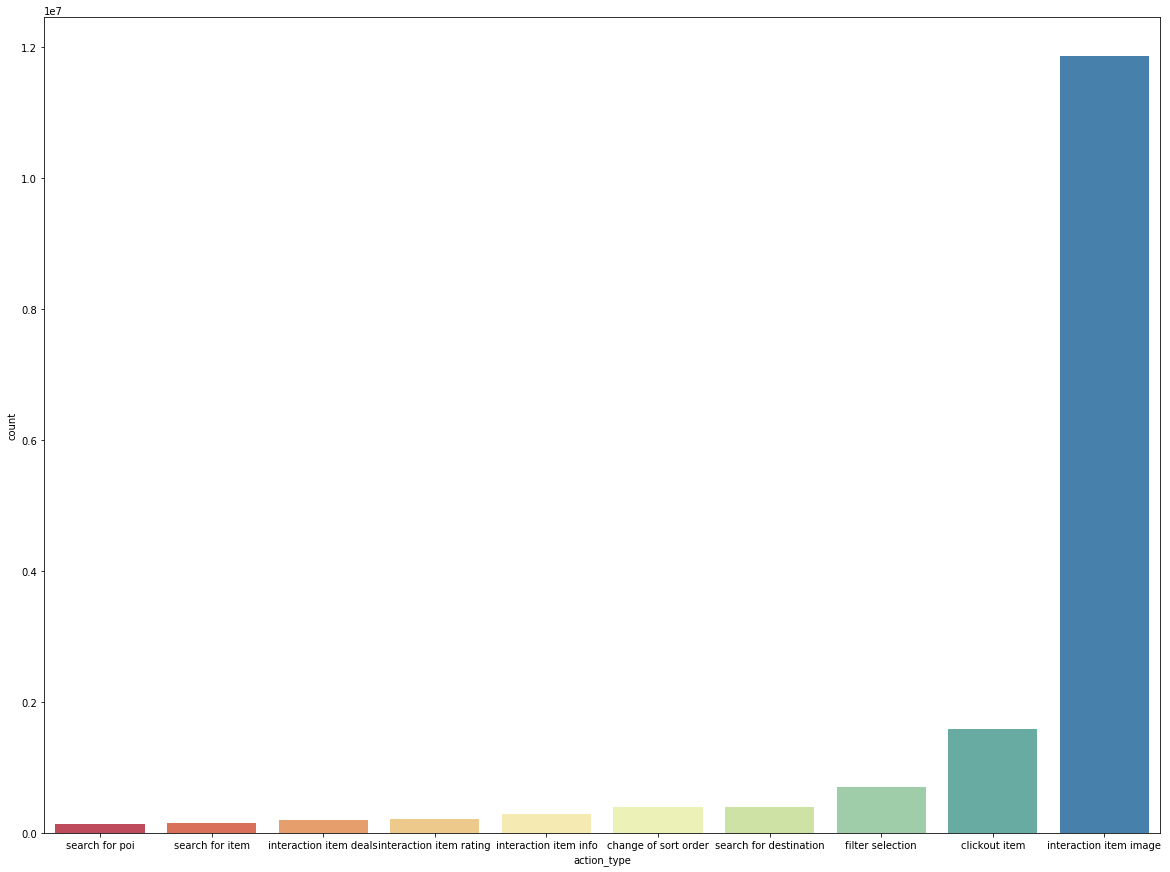

In [53]:
plt.figure(2, figsize=(20,15))
sns.barplot(x='action_type',y='count', data=action_types_df, palette='Spectral')